In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('GLB.Ts+dSST.csv',skiprows = 1)

In [3]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-.14,-.22,-.21,-.16,-.16,***,***,-0.11,-0.15,-.19
1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.18,0.01,-0.02,-.14,-.21,-.17,-.06,-.08,-.08,-.16,0.06,-0.06,-.17
2,1882,0.17,0.15,0.05,-0.16,-0.14,-0.22,-0.16,-0.06,-.14,-.23,-.16,-.36,-.10,-.08,.09,-0.08,-0.15,-.18
3,1883,-0.28,-0.36,-0.12,-0.18,-0.17,-0.07,-0.07,-0.13,-.21,-.11,-.23,-.10,-.17,-.19,-.33,-0.16,-0.09,-.19
4,1884,-0.12,-0.07,-0.36,-0.39,-0.33,-0.34,-0.32,-0.27,-.26,-.25,-.33,-.30,-.28,-.26,-.10,-0.36,-0.31,-.28


In [4]:
df.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
137,2017,1.02,1.14,1.16,0.94,0.91,0.72,0.82,0.87,.77,.90,.87,.93,.92,.91,1.00,1.01,0.80,.85
138,2018,0.81,0.85,0.88,0.88,0.82,0.77,0.83,0.76,.80,1.01,.82,.91,.85,.85,.86,0.86,0.79,.88
139,2019,0.93,0.95,1.17,1.01,0.84,0.91,0.94,0.94,.92,1.01,1.00,1.09,.98,.96,.93,1.01,0.93,.98
140,2020,1.16,1.24,1.17,1.13,1.02,0.92,0.90,0.87,.99,.88,1.11,.81,1.02,1.04,1.17,1.11,0.90,.99
141,2021,0.81,0.64,0.89,0.76,0.79,0.85,0.92,0.81,***,***,***,***,***,***,.75,0.81,0.86,***


In [5]:
dateRng =  pd.date_range(start='1/1/1880', end='1/12/2021', freq='M')
type(dateRng[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
t = pd.DataFrame(dateRng,columns = ['date'])

In [7]:
t['Avg_anomaly_degC'] = None

In [8]:
t.set_index('date',inplace = True)

In [9]:
t.head()

,Avg_anomaly_degC
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None


In [10]:
df = df.iloc[:,:13]

In [11]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-.14,-.22,-.21,-.16
1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.18,0.01,-0.02,-.14,-.21,-.17,-.06
2,1882,0.17,0.15,0.05,-0.16,-0.14,-0.22,-0.16,-0.06,-.14,-.23,-.16,-.36
3,1883,-0.28,-0.36,-0.12,-0.18,-0.17,-0.07,-0.07,-0.13,-.21,-.11,-.23,-.10
4,1884,-0.12,-0.07,-0.36,-0.39,-0.33,-0.34,-0.32,-0.27,-.26,-.25,-.33,-.30


In [12]:
import calendar
from datetime import datetime

In [13]:
def populate_df_with_anomalies(row):
    year = row['Year']
    monthly_anomalies = row.iloc[1:]
    months = monthly_anomalies.index
    
    for month in months:
        last_day = calendar.monthrange(year,datetime.strptime(month,'%b').month)[1]
        date_index = datetime.strptime(f'{year} {month} {last_day}','%Y %b %d')
        t.loc[date_index] = monthly_anomalies[month]
    

In [14]:
_ = df.apply(lambda row:populate_df_with_anomalies(row),axis = 1)

In [15]:
t.head()

,Avg_anomaly_degC
date,
1880-01-31,-0.17
1880-02-29,-0.23
1880-03-31,-0.08
1880-04-30,-0.15
1880-05-31,-0.09


In [16]:
def clean_df_values(val):
    try:
        return float(val)
    except:
        return np.NaN

In [17]:
t['Avg_anomaly_degC'] = t['Avg_anomaly_degC'].apply(lambda val: clean_df_values(val))

In [18]:
t.fillna(method = 'ffill',inplace = True)

In [19]:
t.head()

,Avg_anomaly_degC
date,
1880-01-31,-0.17
1880-02-29,-0.23
1880-03-31,-0.08
1880-04-30,-0.15
1880-05-31,-0.09


In [20]:
t.isnull().sum()

Avg_anomaly_degC    0
dtype: int64

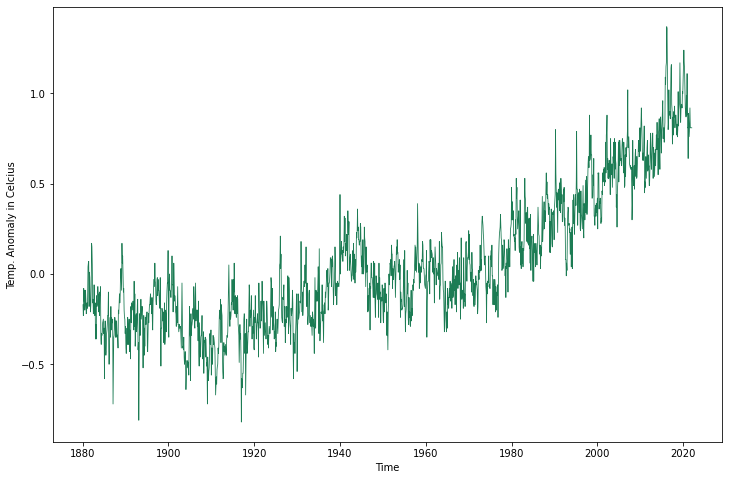

In [21]:
%matplotlib inline

plt.figure(figsize = (12,8))
plt.xlabel('Time')
plt.ylabel('Temp. Anomaly in Celcius')
plt.plot(t,color = '#1C7C54',linewidth = 0.8)

In [22]:
t.resample('A').mean().head()

,Avg_anomaly_degC
date,
1880-12-31,-0.159167
1881-12-31,-0.076667
1882-12-31,-0.105000
1883-12-31,-0.169167
1884-12-31,-0.278333


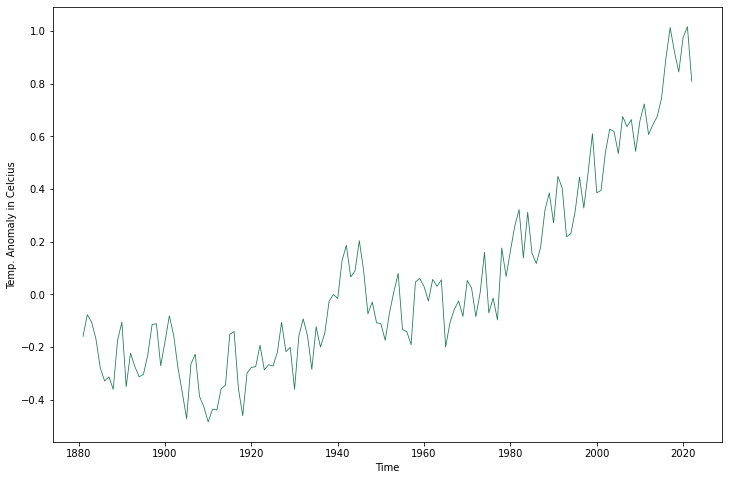

In [23]:
#visualize our resampled dataframe
plt.figure(figsize = (12,8))
plt.xlabel('Time')
plt.ylabel('Temp. Anomaly in Celcius')
plt.plot(t.resample('A').mean(),color = '#1C7C54',linewidth = 0.8)

In [24]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot,init_notebook_mode

In [25]:
#using it offline
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)

In [30]:
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='#ff8c00',
                  yTitle='Temperature Anomaly in Celsius', title='Global Temperature Anomalies',width = 2)


In [29]:
from fbprophet import Prophet

In [30]:
#creating dataframe for prophet model
df_prophet = pd.DataFrame()
df_prophet['ds'] = t.index
df_prophet['y'] = t['Avg_anomaly_degC'].values

In [31]:
df_prophet.head()

,ds,y
0,1880-01-31,-0.17
1,1880-02-29,-0.23
2,1880-03-31,-0.08
3,1880-04-30,-0.15
4,1880-05-31,-0.09


In [32]:
model = Prophet()
model.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


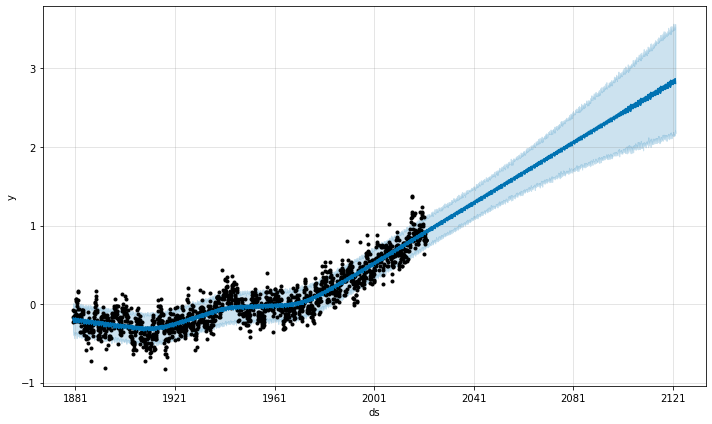

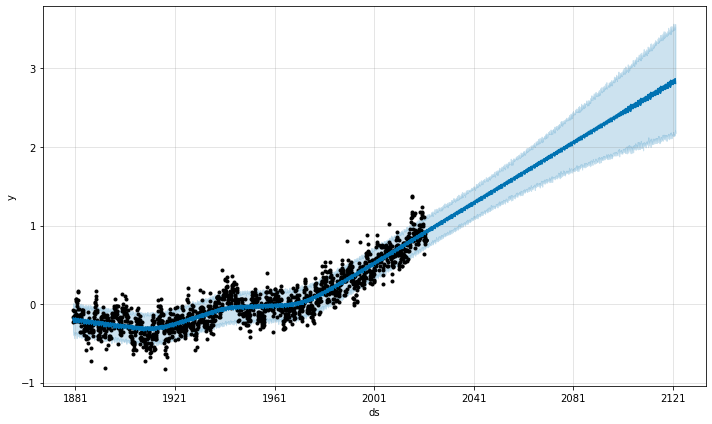

In [33]:
#generating future dataframe containing prediction
future_df = model.make_future_dataframe(freq ='m',periods = 100*12)
forecast = model.predict(future_df)
model.plot(forecast)

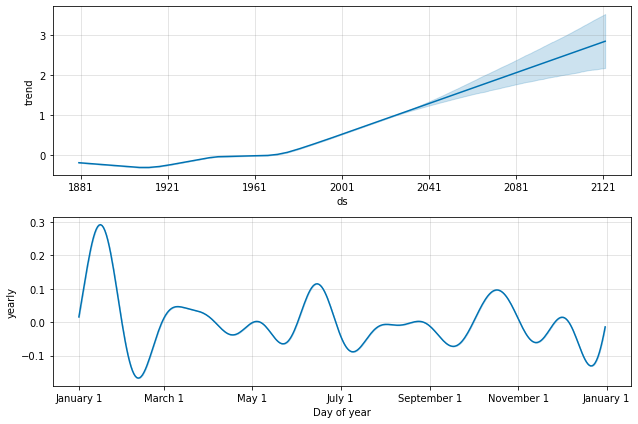

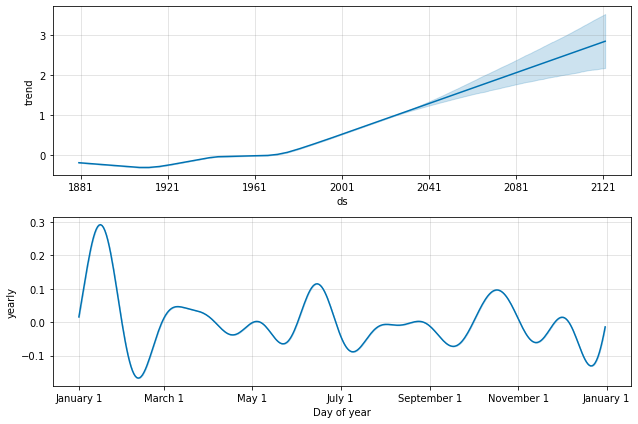

In [34]:
#ploting forecast components
model.plot_components(forecast)

In [35]:
future_df.iplot(kind='line', xTitle='Time (years)', color='#1C7C54',
                  yTitle='Temperature Anomaly in Celsius', title='Global Temperature Anomalies')